In [1]:
import pandas as pd
input = pd.read_excel("section1.xlsx")
input.head()

,Issue Code,Issue,Issue Duration
0,1,Hardware,5
1,2,Software,4
2,3,Network,7
3,4,Connection,6


In [2]:
import random
import pandas as pd

#interarrival Time
randomTime = 19
interarrivalTime =[random.randint(1, 50) for _ in range(randomTime)]

#Arrival Time
ArrivalTime = []
for i in range(len(interarrivalTime)):
  if i==0 :
    ArrivalTime.append(0)
  else:
     ArrivalTime.append(ArrivalTime[i-1] + interarrivalTime[i])

#issue code
randomCode = 19
IssueCode =[random.randint(1, 4) for _ in range(randomCode)]

#issue
issue= [[] for _ in range(len(IssueCode))]
for i in range(len(IssueCode)):
   for j in range(len(input['Issue Code'])):
     if input['Issue Code'][j] == IssueCode[i]:
         issue[i].append(input['Issue'][j])

#serviceTime
serviceTime = [[] for _ in range(len(IssueCode))]
for i in range(len(IssueCode)):
   for j in range(len(input['Issue Code'])):
    #print( str(input['Issue Code'][j]) + " " + str(IssueCode[i]))
    if input['Issue Code'][j] == IssueCode[i]:
         serviceTime[i].append(input['Issue Duration'][j])

#end and begin Time
beginTime = []
endTime = []
for i in range(len(IssueCode)):
  if i==0 :
   beginTime.append(0) , endTime.append(sum(serviceTime[i]))
  else:
   beginTime.append(max(ArrivalTime[i], endTime[i-1])),
   endTime.append(beginTime[i] + sum(serviceTime[i]))

#Customer state
customerState = []
for i in range(len(serviceTime)):
  if beginTime[i] > ArrivalTime[i] :
    customerState.append(str(beginTime[i] - ArrivalTime[i]))
  else:
   customerState.append("inservice")

#system state
systemState = []
for i in range(len(serviceTime)):
  if beginTime[i] > endTime[i-1] :
    systemState.append("idle")
  else:
   systemState.append("busy")

data = {
    'Customer Number': range(1, 20),
    'interarrival time': interarrivalTime ,
    'Arrival Time':ArrivalTime,
    'Issue Code':IssueCode,
    'Issue': issue,
    'begin Time':beginTime,
    'service time': serviceTime,
    'end Time':endTime,
    'customer State':customerState,
    'system State':systemState
}

output = pd.DataFrame(data)
print(output)



    Customer Number  interarrival time  Arrival Time  Issue Code  \
0                 1                 12             0           4   
1                 2                 19            19           4   
2                 3                 17            36           3   
3                 4                 25            61           1   
4                 5                 19            80           1   
5                 6                  7            87           4   
6                 7                 20           107           4   
7                 8                 12           119           2   
8                 9                  1           120           2   
9                10                  4           124           3   
10               11                 33           157           1   
11               12                 40           197           2   
12               13                  1           198           3   
13               14                  1          

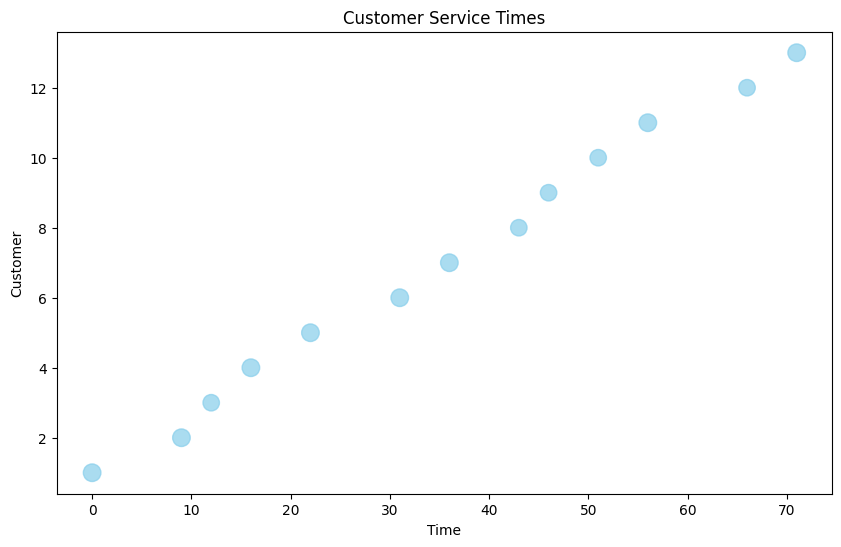

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("Simulation Project.xlsx", sheet_name="Choronological order")
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.scatter(df["arrival time"], df["cust"], s=df["service time"]*20, color="skyblue", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Customer")
plt.title("Customer Service Times")
plt.show()

<Axes: title={'center': 'Service Time'}, xlabel='service time', ylabel='count'>

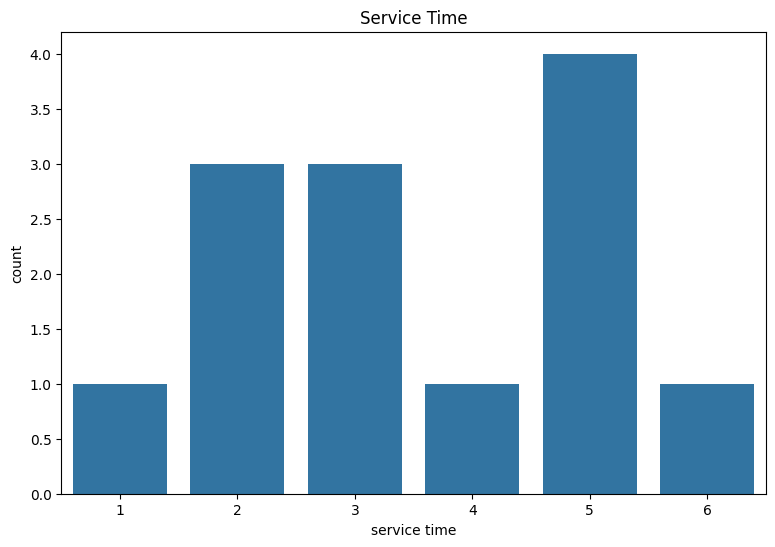

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("Simulation Project.xlsx", sheet_name="Choronological order")
df = pd.DataFrame(data)
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title("Service Time")
sns.countplot(x='service time', data=df)